<a href="https://colab.research.google.com/github/asiyank/Persuasive-Detection-in-Indonesian-News/blob/BiLSTM/RoBERTa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automatic Recognition of Persuasive Content on Electronic News + Text Rank

https://colab.research.google.com/github/dipanjanS/nlp_workshop_odsc19/blob/master/Module05%20-%20NLP%20Applications/Project06%20-%20Text%20Summarization.ipynb

# Install Lib

In [ ]:
import nltk
nltk.download("popular")
from nltk.corpus import stopwords
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
!pip install nlp-id
!pip install transformers
from keras.preprocessing import sequence
import numpy as np
!pip install torch
!pip install tensorflow
!pip install bertviz
!pip install joblib
!pip install networkx==2.6.3

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=71f208787d2fc0014549740ca38e18fe2dc5cc32a8a4c01ff96c1d3506f1f860
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully unins

# Init Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from io import BytesIO

import requests
import pandas as pd

r = requests.get('https://docs.google.com/spreadsheet/ccc?key=1i3BBozbnx9HSTkMsfMHChvzYwG_2MiFB06U05gitD8U&output=xlsx')
data = r.content
dataset = pd.read_excel(data, 'Prepocessed (3)')
dataset

,id-berita,url,judul,content per paragraf,label-positif,label-persuasif,label-produk,perspektif-tunggal,label-berita,labels,content_lower,content_punct,content_lemma,content_token,content_stopwords
0,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Absen Online kini mulai merambah ke berbagai p...,0,0,1,1,native ads,1,absen online kini mulai merambah ke berbagai p...,absen online kini mulai merambah ke berbagai p...,absen online kini mulai rambah ke bagai usaha ...,"['absen', 'online', 'rambah', 'usaha', 'ganti'...",absen online rambah usaha ganti absen manual r...
1,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Sebelum mengetahui manfaat absen online bagi p...,1,1,1,1,native ads,1,sebelum mengetahui manfaat absen online bagi p...,sebelum mengetahui manfaat absen online bagi p...,belum tahu manfaat absen online bagi usaha mar...,"['manfaat', 'absen', 'online', 'usaha', 'mari'...",manfaat absen online usaha mari ajar erti lapo...
2,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Semua data tersebut selanjutnya akan diberikan...,1,0,1,1,native ads,1,semua data tersebut selanjutnya akan diberikan...,semua data tersebut selanjutnya akan diberikan...,semua data sebut lanjut akan beri kepada hrd y...,"['data', 'hrd', 'tanggung', 'gaji', 'karyawan'...",data hrd tanggung gaji karyawan data hrd rugi ...
3,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,Setiap hari karyawan melakukan absen dengan me...,1,1,0,1,native ads,1,setiap hari karyawan melakukan absen dengan me...,setiap hari karyawan melakukan absen dengan me...,tiap hari karyawan laku absen dengan tulis jam...,"['karyawan', 'laku', 'absen', 'tulis', 'jam', ...",karyawan laku absen tulis jam hadir tanda tang...
4,229,https://tekno.sindonews.com/read/807727/776/pe...,Pengertian Absen Online dan Kelebihannya Diban...,"Sementara, Absen online merupakan sistem absen...",1,1,1,1,native ads,1,"sementara, absen online merupakan sistem absen...","sementara, absen online merupakan sistem absen...",sementara absen online rupa sistem absensi yan...,"['absen', 'online', 'rupa', 'sistem', 'absensi...",absen online rupa sistem absensi manfaat jarin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Donald Trump yang menjadi lawan Biden sekaligu...,-1,0,0,1,berita murni,0,donald trump yang menjadi lawan biden sekaligu...,donald trump yang menjadi lawan biden sekalig...,donald trump yang jadi lawan biden sekaligus t...,"['donald', 'trump', 'lawan', 'biden', 'tahana'...",donald trump lawan biden tahana coba serang bi...
2498,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Dalam utas tersebut, Taibbi mengatakan bahwa a...",0,0,0,1,berita murni,0,"dalam utas tersebut, taibbi mengatakan bahwa a...","dalam utas tersebut, taibbi mengatakan bahwa a...",dalam utas sebut taibbi kata bahwa apa yang ak...,"['utas', 'taibbi', 'baca', 'cuplik', 'buah', '...",utas taibbi baca cuplik buah serial dasar ribu...
2499,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,"Namun menurut Taibbi, Twitter pelan-pelan mala...",-1,0,0,0,berita murni,0,"namun menurut taibbi, twitter pelan-pelan mala...","namun menurut taibbi, twitter pelan-pelan mala...",namun turut taibbi twitter pelan malah tambah ...,"['taibbi', 'twitter', 'pelan', 'halang', 'hala...",taibbi twitter pelan halang halang alat kontro...
2500,998,https://cnnindonesia.com/teknologi/20221203102...,Elon Musk Sebut Twitter Tutupi Cerita Kontrove...,Taibbi juga menyebut sejumlah partai politik m...,-1,0,1,1,berita murni,0,taibbi juga menyebut sejumlah partai politik m...,taibbi juga menyebut sejumlah partai po

In [ ]:
len(dataset)

2502

In [ ]:
import re

def changeQuotation(text):
  text = re.sub(r'"',r'“', text)
  return text

In [ ]:
dataset['content per paragraf'] = dataset['content per paragraf'].apply(changeQuotation)

## Split dataset

In [ ]:
# Misalkan menggunakan `content_lemma` sebagai input
texts = dataset['content_lemma'].values
# Variabel target y adalah kombinasi dari empat label
y = dataset['labels'].values

In [ ]:
# x_train1,y_train,x_test1,y_test = train_test_split(embed1,y,80)
# x_train1,x_test1,y_train,y_test = train_test_split(embed1, y, test_size=0.3, random_state=0)
from sklearn.model_selection import KFold

# kf = KFold(n_splits=4)           #KFold(n_splits=’warn’, shuffle=False, random_state=None)
kf = KFold(5,shuffle=True, random_state=0) # Use for KFold classification

for train_index, validation_index in kf.split(texts):
   print("TRAIN:", texts[train_index], "VALIDATION:", texts[validation_index])
   x_train, x_test = texts[train_index], texts[validation_index]
   y_train, y_test = y[train_index], y[validation_index]

TRAIN: ['absen online kini mulai rambah ke bagai usaha ganti absen manual yang rasa sudah tidak terlalu relevan lagi sama hal dengan jenis absensi lain lapor absen online juga isi informasi tentang waktu hadir dan pergi karyawan masuk lambat dan jam lembur hal ini penting bagi usaha yang terap atur gaji dengan jumlah hadir karyawannya dalam format absensi tak hanya itu saja lapor hadir juga guna untuk evaluasi tiap karyawan di usaha yang ujung juga pada nilai kerja karyawan dan produktivitas usaha ikut ini akan ulas kena absen online dan manfaat bagi usaha'
 'semua data sebut lanjut akan beri kepada hrd yang tanggung jawab pada gaji karyawan oleh karena itu data yang beri kepada pihak hrd harus jelas dan tidak ada yang lewat agar tak ada yang rugi untuk itu usaha perlu sistem yang dapat meminimalisir salah rekap data salah satu dengan guna sistem absen online cara umum ada dua jenis absen yang dapat guna oleh usaha yakni absensi dengan format manual dan format online absensi dengan for

(2002, 2)


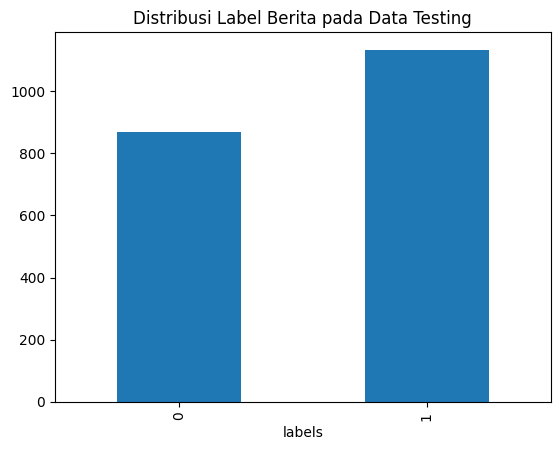

In [ ]:
import matplotlib.pyplot as plt

df_train = pd.DataFrame(list(zip(x_train, y_train)), columns=['content_lemma', 'labels'])
df_train.groupby(['labels']).size().plot(kind='bar')
plt.title('Distribusi Label Berita pada Data Testing')
print(df_train.shape)

(500, 2)


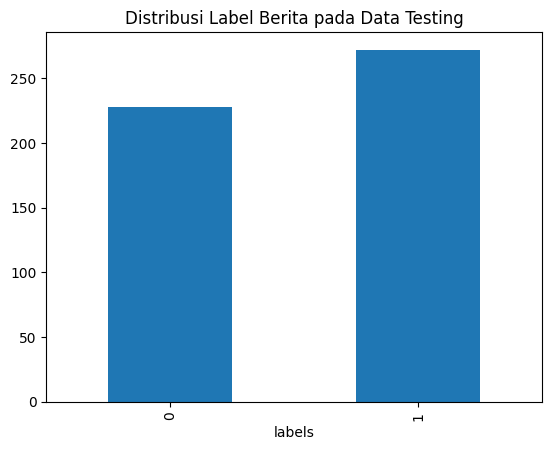

In [ ]:
df_test = pd.DataFrame(list(zip(x_test, y_test)), columns=['content_lemma', 'labels'])
df_test.groupby(['labels']).size().plot(kind='bar')
plt.title('Distribusi Label Berita pada Data Testing')
print(df_test.shape)

# Word Embedding (roBERTa)

In [ ]:
from transformers import RobertaTokenizer, TFRobertaModel

tokenizer = RobertaTokenizer.from_pretrained('cahya/roberta-base-indonesian-522M', do_lower_case=True)
indo_roberta = TFRobertaModel.from_pretrained('cahya/roberta-base-indonesian-522M', from_pt=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/926k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/468k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/507M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.decoder.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [ ]:
import transformers
print(transformers.__version__)
print(dir(transformers))

4.41.2
['ASTConfig', 'ASTFeatureExtractor', 'ASTForAudioClassification', 'ASTModel', 'ASTPreTrainedModel', 'Adafactor', 'AdamW', 'AdamWeightDecay', 'AdaptiveEmbedding', 'AddedToken', 'Agent', 'AlbertConfig', 'AlbertForMaskedLM', 'AlbertForMultipleChoice', 'AlbertForPreTraining', 'AlbertForQuestionAnswering', 'AlbertForSequenceClassification', 'AlbertForTokenClassification', 'AlbertModel', 'AlbertPreTrainedModel', 'AlbertTokenizer', 'AlbertTokenizerFast', 'AlignConfig', 'AlignModel', 'AlignPreTrainedModel', 'AlignProcessor', 'AlignTextConfig', 'AlignTextModel', 'AlignVisionConfig', 'AlignVisionModel', 'AltCLIPConfig', 'AltCLIPModel', 'AltCLIPPreTrainedModel', 'AltCLIPProcessor', 'AltCLIPTextConfig', 'AltCLIPTextModel', 'AltCLIPVisionConfig', 'AltCLIPVisionModel', 'AlternatingCodebooksLogitsProcessor', 'AqlmConfig', 'AudioClassificationPipeline', 'AutoBackbone', 'AutoConfig', 'AutoFeatureExtractor', 'AutoImageProcessor', 'AutoModel', 'AutoModelForAudioClassification', 'AutoModelForAudioF

In [ ]:
max_len = 257
def encode_texts(text_list):
   # Inisialisasi list untuk menampung hasil
    input_ids = []
    attention_masks = []

    for text in text_list:
        encoded_dict = tokenizer.encode_plus(
            text,
            add_special_tokens=True,  # Tambahkan [CLS] dan [SEP]
            max_length=max_len,
            padding='max_length',
            truncation=True,  # Aktifkan pemotongan jika teks lebih panjang
            return_tensors='tf',  # Mengembalikan TensorFlow tensors
            return_attention_mask=True  # Menghasilkan attention mask
        )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    return {'input_ids': tf.concat(input_ids, axis=0), 'attention_mask': tf.concat(attention_masks, axis=0)}

In [ ]:
# Encode data training dan testing
import tensorflow as tf

train_encodings = encode_texts(x_train)
test_encodings = encode_texts(x_test)

In [ ]:
# build model fine tuning bert
# def get_embeddings(encoded_texts, batch_size=16):
#     outputs = indobert(encoded_texts['input_ids'], attention_mask=encoded_texts['attention_mask'])
#     return outputs.last_hidden_state  # Mengambil output embeddings

# Function to get embeddings with smaller batch size
def get_embeddings(encoded_texts, batch_size=16):
    embeddings = []
    for i in range(0, len(encoded_texts['input_ids']), batch_size):
        batch_input_ids = encoded_texts['input_ids'][i:i+batch_size]
        batch_attention_mask = encoded_texts['attention_mask'][i:i+batch_size]
        outputs = indo_roberta(batch_input_ids, attention_mask=batch_attention_mask)
        embeddings.append(outputs.last_hidden_state)
    return tf.concat(embeddings, axis=0)

# Mendapatkan embeddings untuk data training dan testing
train_embeddings = get_embeddings(train_encodings)
test_embeddings = get_embeddings(test_encodings)

In [ ]:
from tensorflow.keras.layers import Input
# Input untuk token IDs dan attention mask
input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
attention_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")

In [ ]:
# Verifikasi tipe dan shape dari input_ids dan attention_mask
print(f"Type of input_ids: {type(input_ids)}")
print(f"Shape of input_ids: {input_ids.shape}")
print(f"Type of attention_mask: {type(attention_mask)}")
print(f"Shape of attention_mask: {attention_mask.shape}")

Type of input_ids: <class 'keras.src.engine.keras_tensor.KerasTensor'>
Shape of input_ids: (None, 257)
Type of attention_mask: <class 'keras.src.engine.keras_tensor.KerasTensor'>
Shape of attention_mask: (None, 257)


In [ ]:
# Mendapatkan embeddings dari IndoBERT
roberta_output = indo_roberta(input_ids, attention_mask=attention_mask)
sequence_output = roberta_output[0]  # Mengambil last_hidden_state

TypeError: Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

Could not build a TypeSpec for name: "tf.debugging.assert_less/assert_less/Assert/Assert"
op: "Assert"
input: "tf.debugging.assert_less/assert_less/All"
input: "tf.debugging.assert_less/assert_less/Assert/Assert/data_0"
input: "tf.debugging.assert_less/assert_less/Assert/Assert/data_1"
input: "tf.debugging.assert_less/assert_less/Assert/Assert/data_2"
input: "Placeholder"
input: "tf.debugging.assert_less/assert_less/Assert/Assert/data_4"
input: "tf.debugging.assert_less/assert_less/y"
attr {
  key: "T"
  value {
    list {
      type: DT_STRING
      type: DT_STRING
      type: DT_STRING
      type: DT_INT32
      type: DT_STRING
      type: DT_INT32
    }
  }
}
attr {
  key: "summarize"
  value {
    i: 3
  }
}
 of unsupported type <class 'tensorflow.python.framework.ops.Operation'>.

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=<KerasTensor: shape=(None, 257) dtype=int32 (created by layer 'input_ids')>
  • position_ids=None
  • token_type_ids=<KerasTensor: shape=(None, 257) dtype=int32 (created by layer 'tf.fill')>
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False

In [ ]:
import tensorflow as tf
import transformers

print(tf.__version__)
print(transformers.__version__)


In [ ]:
print(input_ids.shape)
print(input_ids.dtype)
print(attention_mask.shape)
print(attention_mask.dtype)

In [ ]:
print(input_ids)
print(attention_mask)

In [ ]:
# dataset['content_ids'] = ''
# dataset['content_segment_ids'] = ''

# dataset['content_ids_pad'] = ''
# dataset['content_segment_ids_pad'] = ''

In [ ]:
# def tokenize_with_padding(sentence):
#     encoded_dict = tokenizer.encode_plus(
#                         sentence,
#                         add_special_tokens = True,
#                         truncation=True,
#                         max_length = 50,
#                         padding = 'max_length',
#                    )
#     return encoded_dict['input_ids']

In [ ]:
# for i, row in dataset.iterrows():
#     kalimat1 = tokenizer.tokenize("[CLS] "+ row['content_stopwords'] + " [SEP]")

#     dataset.at[i,'content_stopwords'] = kalimat1

#     dataset.at[i,'content_ids'] = tokenizer.convert_tokens_to_ids(kalimat1)
#     dataset.at[i,'content_segment_ids'] = [i] * len(kalimat1)


#     kalimat1pad = tokenize_with_padding(kalimat1)

#     dataset.at[i,'content_ids_pad'] = kalimat1pad
#     dataset.at[i,'content_segment_ids_pad'] = [i] * len(kalimat1pad)

In [ ]:
dataset.head()

In [ ]:
# kalimat1_token = []
# kalimat1_segment = []

# for i, row in dataset.iterrows():
#     # if i == 200:
#         # break;

#     kalimat1_token.append(row['content_ids_pad'])
#     kalimat1_segment.append(row['content_segment_ids_pad'])

In [ ]:
# import torch
# k1token_tensor = torch.tensor(kalimat1_token)
# k1segment_tensor = torch.tensor(kalimat1_segment)

In [ ]:
# model = RobertaModel.from_pretrained('cahya/roberta-base-indonesian-522M', output_hidden_states = True)
# model.eval()

In [ ]:
# with torch.no_grad():
#     outputs = model(k1token_tensor)
#     hidden_states = outputs[2]

# Ga dipakai

## View the output

In [ ]:
# print ("Number of layers:", len(hidden_states), "  (initial embeddings + 12 BERT layers)")
# print ("Number of batches:", len(hidden_states[0]))
# print ("Number of tokens:`", len(hidden_states[0][0]))
# print ("Number of hidden units:", len(hidden_states[0][0][0]))

## Combine tensor

In [ ]:
# token_embeddings = torch.stack(hidden_states, dim=0)
# token_embeddings.size()

## Swap dimensions, so we get tensors in format: [sentence, tokens, hidden layes, features]

In [ ]:
# token_embeddings = token_embeddings.permute(1,2,0,3)
# token_embeddings.size()

## We will use last four hidden layers to create each word embedding

In [ ]:
# processed_embeddings = token_embeddings[:, :, 9:, :]
# processed_embeddings.shape

In [ ]:
# embeddings_cpy = processed_embeddings.clone().detach()

## Convert data

### Check embedding size that used as an input for LSTM

In [ ]:
# size = (embeddings_cpy[0].size()[0],embeddings_cpy[0].size()[1],embeddings_cpy[0].size()[2])
# size

## Change embedding dimension to [sequnce_length, embedding_dim]

In [ ]:
# embeddings_cpy = embeddings_cpy.reshape(len(dataset), 50, 3072)

In [ ]:
# size = (embeddings_cpy[0].size()[0],embeddings_cpy[0].size()[1])
# size

## Convert torch tensor to numpy array

In [ ]:
# embed = embeddings_cpy.numpy()

## Helper function

In [ ]:
# # def train_test_split(x,y,train_percent):
# #     x = np.array(x).astype(np.float32)
# #     y = np.array(y)
# #     length = len(y)
# #     split = int(length * (train_percent/100))
# #     return (np.asarray(x[0:split]).astype(np.float32),
# #             np.asarray(y[0:split]).astype(np.float32),
# #             np.asarray(x[split:]).astype(np.float32),
# #             np.asarray(y[split:]).astype(np.float32)
# #         )
# from sklearn.model_selection import train_test_split

In [ ]:
# def combine_embedding_dataset(data1):
#     result = []
#     for d1 in zip(data1):
#         result.append([d1])
#     return np.array(result)

## Get labels from pandas dataframe

In [ ]:
# # Mendapatkan indeks kolom
# indeks_label_positif = dataset.columns.get_loc('label-positif')
# indeks_label_persuasif = dataset.columns.get_loc('label-persuasif')
# indeks_label_produk = dataset.columns.get_loc('label-produk')
# indeks_perspektif_tunggal = dataset.columns.get_loc('perspektif-tunggal')
# indeks_labels = dataset.columns.get_loc('labels')
# # Variabel target y adalah kombinasi dari empat label

# # label2 = dataset.iloc[:, [indeks_labels]].copy()
# # label2.head()
# y = dataset['labels'].values

In [ ]:
# len(y)

## Convert to numpy array

In [ ]:
#y = y.to_numpy()
#y

## Convert string labels to integer

In [ ]:
# y = y.astype(int)
# y

## Create dataset combined from two embedding

In [ ]:
# x = combine_embedding_dataset(embed)

## Split dataset

In [ ]:
# # x_train1,y_train,x_test1,y_test = train_test_split(embed1,y,80)
# # x_train1,x_test1,y_train,y_test = train_test_split(embed1, y, test_size=0.3, random_state=0)
# from sklearn.model_selection import KFold

# # kf = KFold(n_splits=4)           #KFold(n_splits=’warn’, shuffle=False, random_state=None)
# kf = KFold(5,shuffle=True, random_state=0) # Use for KFold classification

# for train_index, validation_index in kf.split(embed):
#    print("TRAIN:", embed[train_index], "VALIDATION:", embed[validation_index])
#    x_train, x_test = embed[train_index], embed[validation_index]
#    y_train, y_test = y[train_index], y[validation_index]

In [ ]:
# y_train.shape

In [ ]:
# y_test

## Create one hot encoding labels

In [ ]:
# y_train = tf.keras.utils.to_categorical(y_train, 2)
# y_test = tf.keras.utils.to_categorical(y_test, 2)

In [ ]:
# embed.shape

In [ ]:
# size

# BiLSTM

In [ ]:
from keras import Model
from keras import Sequential
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Input, Embedding, Conv1D, Bidirectional, LSTM, Dense, Dropout, BatchNormalization, GlobalMaxPooling1D,concatenate,ConvLSTM1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import SpatialDropout1D
import joblib

source code from https://github.com/hrshtv/Twitter-Sentiment-Analysis/blob/master/old/Keras-Simple-BiLSTM.ipynb

In [ ]:
# Mendapatkan embeddings dari IndoRoBERTa
roberta_output = indo_roberta(input_ids, attention_mask=attention_mask)
sequence_output = roberta_output[0]  # Mengambil last_hidden_state

In [ ]:
import tensorflow as tf

out = tf.keras.layers.BatchNormalization()(sequence_output)
out = tf.keras.layers.Dropout(0.2)(out)
out = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True))(out)
out = tf.keras.layers.GlobalMaxPooling1D()(out)
out = tf.keras.layers.Dropout(0.2)(out)
y = tf.keras.layers.Dense(2, activation="sigmoid")(out)

model = tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)
model.layers[2].trainable = True

optimizer = tf.keras.optimizers.Adam(learning_rate=2e-05)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
metric = tf.keras.metrics.CategoricalAccuracy('balanced_accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=metric)
model.summary()


In [ ]:
# import tensorflow as tf
# tf.keras.backend.clear_session()

# model = Sequential([
#     # Lapisan embedding yang mengonversi input integer menjadi vektor dense
#     Embedding(input_dim=257, output_dim=300, input_length=257, ),
#     BatchNormalization(),
#     Dropout(0.2),  # Tambahkan Dropout
#     # Lapisan BiLSTM
#     Bidirectional(LSTM(256, return_sequences=True)),
#     GlobalMaxPooling1D(),  # Tambahkan GlobalMaxPooling1D
#     # Opsional: Tambahkan dropout untuk regularisasi
#     Dropout(0.2),
#     # Lapisan Dense untuk klasifikasi
#     Dense(2, activation='sigmoid')  # '4' sesuai dengan jumlah label target Anda, sesuaikan jika berbeda
# ])

# # Ringkasan model
# model.summary()


In [ ]:
y_train_dl = tf.keras.utils.to_categorical(y_train)
y_test_dl = tf.keras.utils.to_categorical(y_test)

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Gunakan 'sparse_categorical_crossentropy' jika label adalah integer
              metrics=['accuracy'])

In [ ]:
history = model.fit(x=x_train, y=y_train, epochs=50, batch_size=128, validation_data=(x_test,y_test), verbose=1)
save_path = '/content/drive/MyDrive/Colab Notebooks/Thesis Persuasive Detection at Paragraph-Level  /Embedding Models/model_roberta_bilstm.pkl'
joblib.dump(model, save_path)
score = model.evaluate(x_test, y_test,verbose=0)
print("Accuracy: {}".format(score[1] * 100))

## Get Evaluate Score

In [ ]:
yhat = model.predict(x_test, verbose=0)
classes_x=np.argmax(yhat,axis=1)

In [ ]:
y_asdadasd = []
for data in y_test:
  for i,item in enumerate(data):
    if item == 1:
      y_asdadasd.append(i)

npa = np.asarray(y_asdadasd)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, cohen_kappa_score
from sklearn.metrics import precision_recall_fscore_support as score

precision,recall,fscore,support=score(npa,classes_x,average='macro')
print('Precision : ',format(precision))
print('Recall    : ',format(recall))
print('F-score   : ',format(fscore))
print('Accuracy : ',accuracy_score(npa, classes_x))

In [ ]:
npa

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

labels = ["News", "Native Ads"]

cm = confusion_matrix(npa, classes_x)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()

## roc

In [ ]:
import numpy as np
from sklearn import metrics

y = np.array(npa)

scores = np.array(classes_x)
fpr, tpr, thresholds = metrics.roc_curve(npa, classes_x, pos_label=9)
roc_auc = metrics.auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr_rf, tpr_rf, thresholds_rf = roc_curve(npa, classes_x)
auc_rf = auc(fpr_rf, tpr_rf)

In [ ]:
auc_rf

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr,tpr)
  plt.axis([0,1,0,1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr , tpr , thresholds = roc_curve ( npa , classes_x)

In [ ]:
plot_roc_curve (fpr,tpr)

In [ ]:
roc_auc_score(npa,classes_x)

In [ ]:
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(npa, classes_x)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
print(auc_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

In [ ]:
classes_x

In [ ]:
npa

In [ ]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)):
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [ ]:
perf_measure(npa,classes_x)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()




plt.show()